#***Introducción al Aprendizaje Automático***

---


#***Predicción de Diabetes a partir de Indicadores de Salud y Estilo de Vida***
------

**Integrantes Grupo 1:**


* Integrante: Maria Victoria D'Ercole   
e-mail: mvdercole@estudiantes.unsam.edu.ar

* Integrante: Julieta Belen Dasso    
e-mail: jbdasso@estudiantes.unsam.edu.ar

* Integrante: Emilio Martin Li Gioi   
e-mail: emartinligioi@gmail.com



Título del entregable: **Predicción de Diabetes a partir de Indicadores de Salud y Estilo de Vida**

Enlace al conjunto de datos original: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_health_indicators_BRFSS2015.csv

#**-- Primera Parte --**

**Introducción**

La diabetes es una enfermedad crónica que afecta la forma en que el cuerpo regula el azúcar en sangre (glucosa). Su prevalencia ha aumentado significativamente en las últimas décadas, convirtiéndose en uno de los principales problemas de salud pública a nivel mundial. Existen distintos tipos de diabetes, siendo los más comunes la tipo 1 (de origen autoinmune), la tipo 2 (asociada a factores como el sobrepeso y el sedentarismo) y la diabetes gestacional (detectada durante el embarazo).

La detección temprana y el tratamiento adecuado son fundamentales para prevenir complicaciones graves como enfermedades cardiovasculares, daño renal, pérdida de visión y amputaciones.

En este contexto, el desarrollo de herramientas automatizadas que permitan identificar a personas en riesgo resulta clave para mejorar las estrategias de prevención y diagnóstico. El presente trabajo tiene como objetivo construir modelos de aprendizaje automático que permitan predecir la probabilidad de que un individuo presente diabetes, a partir de indicadores de salud y hábitos de vida fácilmente recolectables, como el índice de masa corporal (BMI), la edad, la presencia de hipertensión o colesterol alto, entre otros.

A través de diferentes enfoques de modelado y evaluación, se busca no solo lograr un desempeño adecuado en términos de predicción, sino también comprender qué variables tienen mayor influencia en el riesgo de desarrollar diabetes. Esto permitirá avanzar hacia soluciones prácticas que puedan ser implementadas en campañas de tamizaje o sistemas de salud, priorizando siempre la detección temprana y la reducción de falsos negativos en escenarios clínicos preventivos.

**Descripción del conjunto de datos: Diabetes Health Indicators Dataset**

Este conjunto de datos proviene originalmente del CDC (Centers for Disease Control and Prevention), una agencia de salud pública de los Estados Unidos. Fue elaborado como parte del programa BRFSS (Behavioral Risk Factor Surveillance System), una encuesta de salud telefónica que se realiza anualmente desde 1984 y que hoy abarca a los 50 estados, el Distrito de Columbia y varios territorios estadounidenses. La BRFSS recolecta información sobre comportamientos relacionados con enfermedades crónicas, acceso a servicios de salud, y condiciones médicas como la diabetes.

Debido a que los datos originales del CDC son muy extensos y complejos de manejar, en Kaggle se ofrece una versión más accesible y simplificada: Diabetes Health Indicators Dataset, subida por el usuario alexteboul. Esta versión contiene variables seleccionadas que se consideran indicadores clave para la predicción de diabetes, basadas en respuestas de la encuesta BRFSS.

En esta versión, cada fila representa un individuo y las columnas incluyen variables como: si tiene colesterol alto, presión arterial alta, índice de masa corporal (IMC), nivel de actividad física, alimentación, calidad del sueño, y otros hábitos relacionados con la salud. Su objetivo principal es predecir si una persona ha sido diagnosticada con diabetes.


In [ ]:
#Importamos todas las librerías que vamos a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import make_pipeline

**Exploración del conjunto de datos**

In [ ]:
#Cargamos el dataset
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#¿Cuántas filas y columnas tiene?
print("Tiene:", df.shape[0], "filas y", df.shape[1], "columnas")

Tiene: 253680 filas y 22 columnas


In [ ]:
#¿Hay valores faltantes en algunas columnas?
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


No hay valores faltantes

In [ ]:
#Análisis de tipos de datos
df.dtypes

,0
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


Muchas de estas columnas, aunque sean numéricas, deben tratarse como categóricas para el análisis.

**Variables Numéricas Continuas:**
   
* BMI (Índice de Masa Corporal)

* PhysicalHealth (Cantidad de días de mala salud física en los últimos 30 días)

* MentalHealth (Cantidad de días de mala salud mental)

* SleepTime (Horas de sueño)


**Variables Categóricas (aunque estén como float):**

Estas son variables binarias (0 o 1) o con pocos valores posibles. Resuelta conveniente trabajarlas como categóricas.

* Diabetes_binary (variable objetivo: 0 = no tiene diabetes, 1 = tiene diabetes)

* HighBP (Hipertensión)

* HighChol (Colesterol alto)

* CholCheck (Se controló el colesterol en el último año)

* Smoker (Fuma actualmente)

* Stroke (Tuvo un ACV)

* HeartDiseaseorAttack (Tuvo infarto o enfermedad coronaria)

* PhysActivity (Hace actividad física)

* Fruits (Consume frutas regularmente)

* Veggies (Consume verduras regularmente)

* HvyAlcoholConsump (Consumo excesivo de alcohol)

* AnyHealthcare (Tiene algún tipo de seguro de salud)

* NoDocbcCost (No pudo ver al médico por razones económicas)

* GenHlth (Autoevaluación de salud general: 1 a 5, ordinal)

* DiffWalk (Dificultad para caminar)

* Sex (0 = Mujer, 1 = Hombre)

* Age (codificada: valores entre 1 y 13, representan grupos de edad)






**Pregunta a resolver:** ¿Es posible predecir si una persona tiene diabetes a partir de indicadores de salud y estilo de vida?

**Explicación:** El presente trabajo tiene como objetivo predecir la presencia de diabetes a partir de variables asociadas al estado de salud, los hábitos y las características demográficas de los registros disponibles. La variable a predecir es Diabetes_binary, codificada como 1 cuando se identifica un diagnóstico de diabetes y 0 en caso contrario. Dado que se trata de una variable binaria, el problema se enmarca dentro de una tarea de clasificación.

Para evaluar el desempeño del modelo, se considera apropiado el uso de métricas propias de problemas de clasificación binaria. Entre ellas, la exactitud podría resultar útil como medida general, mientras que el recall adquiriría especial relevancia en este contexto, dado que permitiría estimar la capacidad del modelo para identificar correctamente los casos positivos. Asimismo, métricas como la precisión, el F1-score y la matriz de confusión podrían aportar información complementaria sobre la calidad de las predicciones.

Dado que el objetivo es predecir la presencia de diabetes, se consideran dos variables que podrían tener un buen poder predictivo: BMI y Age. Vale la pena destacar que se trata meramente de una suposición dado que se determina antes de estudiar dichas variables.

El índice de masa corporal (BMI) es una medida ampliamente utilizada para evaluar el nivel de sobrepeso u obesidad, factores reconocidos por la literatura médica como asociados al desarrollo de diabetes tipo 2. Por otro lado, la variable Age, aunque codificada, representa distintos rangos etarios, y suele mencionarse que el riesgo de padecer diabetes tiende a aumentar con la edad.

A continuación se presentan dos gráficos que permiten visualizar la relación de estas variables con la variable objetivo Diabetes_binary

<ipython-input-9-a8d08485ce2e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Diabetes_binary', y='BMI', palette='pastel')
<ipython-input-9-a8d08485ce2e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_diabetes, x='GrupoEtario', y='Diabetes_binary', palette='muted')


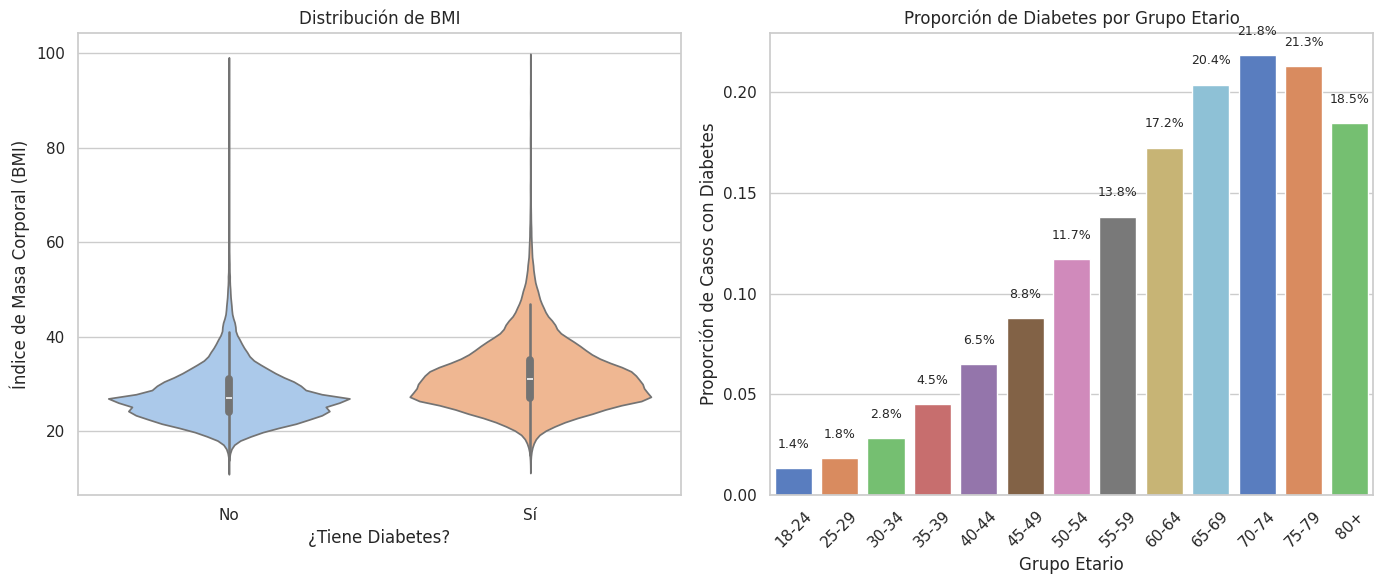

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Distribución de BMI según presencia de diabetes
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Diabetes_binary', y='BMI', palette='pastel')
plt.title('Distribución de BMI')
plt.xlabel('¿Tiene Diabetes?')
plt.ylabel('Índice de Masa Corporal (BMI)')
plt.xticks([0, 1], ['No', 'Sí'])


# Proporción de diabetes por grupo etario (esto nos da una idea clara de cómo aumenta el riesgo de diabetes con la edad)
plt.subplot(1, 2, 2)
age_labels = [
    '18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
]

# Agrupamos y preparamos los datos
age_diabetes = df.groupby('Age')['Diabetes_binary'].mean().reset_index()
age_diabetes['GrupoEtario'] = age_labels

sns.barplot(data=age_diabetes, x='GrupoEtario', y='Diabetes_binary', palette='muted')
plt.title('Proporción de Diabetes por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Proporción de Casos con Diabetes')
plt.xticks(rotation=45)


#agregamos porcentajes sobre las barras
for i, valor in enumerate(age_diabetes['Diabetes_binary']):
    plt.text(i, valor + 0.01, f'{valor:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()




Los resultados visuales sugieren que tanto el índice de masa corporal (BMI) como el grupo etario (Age) podrían tener una relación con la presencia de diabetes. En el primer gráfico se observa que la distribución de BMI es ligeramente más alta en los casos con diabetes, lo que indica que, en promedio, quienes presentan la enfermedad tienden a tener un mayor índice de masa corporal. En cuanto a la variable Age, el segundo gráfico muestra una tendencia creciente en la proporción de personas con diabetes a medida que aumentan los grupos etarios, lo cual refuerza la hipótesis de que el riesgo de desarrollar esta condición se incrementa con la edad.

#**-- Segunda parte --**

**Resumen:**

El presente trabajo tiene como objetivo desarrollar un modelo predictivo de diagnóstico de diabetes a partir de indicadores de salud y hábitos de vida, utilizando el conjunto de datos Diabetes Health Indicators. En la primera etapa, se realizó una exploración exhaustiva del dataset, identificando variables relevantes como el índice de masa corporal (BMI) y la edad (Age) por su potencial valor predictivo. Mediante visualizaciones estadísticas, se evidenció una asociación positiva entre dichas variables y la presencia de diabetes, lo cual constituye un avance significativo hacia la construcción de un modelo de clasificación supervisada.

**Modelo de referencia (Benchmark)**
---


Como punto de partida para la construcción de modelos predictivos más complejos, se propone un modelo de referencia sencillo que permita establecer un nivel básico de desempeño. Este modelo benchmark tiene como objetivo funcionar como línea base, de manera que permita evaluar si futuras incorporaciones de variables o algoritmos más sofisticados realmente mejoran la capacidad predictiva.

Para ello, se utiliza un modelo llamado DummyClassifier, que no realiza ningún aprendizaje real a partir de los datos. En este caso, se configura la estrategia stratified, que genera predicciones aleatorias respetando la proporción original de clases (casos positivos y negativos). Esto permite tener una comparación más realista que simplemente predecir siempre la clase mayoritaria.

A continuación, se entrena dicho modelo y se evalúa su rendimiento utilizando métricas clave como exactitud (accuracy), exhaustividad (recall) y precisión (precision). Cualquier modelo posterior que no supere estas métricas mínimas puede considerarse deficiente, ya que ni siquiera supera un modelo que no aprende.

In [ ]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

#Definimos los features y la variable target
X = df[["BMI", "Age"]]
y = df["Diabetes_binary"]

#Separamos en conjuntos de train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Definimos y entrenamos el modelo de referencia (benchmark)
benchmark_model = DummyClassifier(strategy="stratified", random_state=42)
benchmark_model.fit(X_train, y_train)

#Se predice sobre el conjunto de prueba
y_pred = benchmark_model.predict(X_test)

#Se evalúa el modelo y se muestran los resultados
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print("Modelo de referencia (Benchmark)\n")
print(f"Exactitud (Accuracy): {round(accuracy, 2)}")
print(f"Exhaustividad (Recall): {round(recall, 2)}")
print(f"Precisión (Precision): {round(precision, 2)}\n")
print("Reporte de clasificación:\n", report)

Modelo de referencia (Benchmark)

Exactitud (Accuracy): 0.76
Exhaustividad (Recall): 0.14
Precisión (Precision): 0.14

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     43739
         1.0       0.14      0.14      0.14      6997

    accuracy                           0.76     50736
   macro avg       0.50      0.50      0.50     50736
weighted avg       0.76      0.76      0.76     50736



El modelo de referencia obtiene una exactitud del 76%, lo que a simple vista podría parecer aceptable. Sin embargo, este valor se ve influenciado por el fuerte desbalance en el conjunto de datos, donde predominan los casos negativos (sin diabetes). Al analizar métricas más relevantes para la clase positiva —como la exhaustividad (recall) y la precisión (precision), ambas del 14%— se evidencia que el modelo tiene una capacidad muy limitada para detectar correctamente los casos de diabetes.

Estos resultados reflejan que el benchmark no tiene valor predictivo real, pero cumple su función como línea base: establece un nivel mínimo de desempeño, que cualquier modelo más sofisticado y entrenado con criterios adecuados (como el manejo del desbalance de clases) debería superar. Esto resalta la importancia de construir modelos que no solo sean precisos en general, sino también efectivos para identificar correctamente a los individuos con mayor riesgo.

**Consideraciones sobre el desbalance de clases** ver si lo colocamos en otro lado o lo dejamos aca
--


Una de las principales dificultades del presente trabajo fue el marcado desbalance en el conjunto de datos, donde la mayoría de los registros corresponde a individuos sin diagnóstico de diabetes. Este desequilibrio puede afectar significativamente la capacidad del modelo para aprender a reconocer la clase minoritaria (diabéticos), generando un sesgo hacia la clase mayoritaria.

Para mitigar este problema, se utilizó el ajuste de clase, el parámetro class_weight='balanced' de los modelos de regresión logística (aunque podriamos haber considerado tecnicas de remuestreo, como submuestreo o sobremuestreo). Esta estrategia ajusta automáticamente los pesos de las clases en función de su frecuencia, lo que permite al modelo prestar mayor atención a los casos positivos (diabetes), es decir, priorizando la capacidad del modelo para detectar correctamente los casos positivos, especialmente relevantes en contextos clínicos preventivos.

Este enfoque fue elegido deliberadamente, considerando que en contextos clínicos es preferible minimizar los falsos negativos, aunque eso implique algunas alertas innecesarias. En aplicaciones como el tamizaje poblacional o la prevención temprana, es más aceptable "sobrediagnosticar" que dejar casos sin detectar.

**Primer modelo de Machine Learning**
---

En este primer modelo predictivo se implementa una regresión logística utilizando únicamente dos atributos: el Índice de Masa Corporal (BMI) y la Edad (Age). Estas variables fueron seleccionadas por su relevancia clínica y su fácil disponibilidad.

Dado que el conjunto de datos presenta un fuerte desbalance entre clases (una mayoría de casos sin diabetes), se aplicó el parámetro class_weight='balanced' para que el modelo ajuste automáticamente los pesos de cada clase y mejore la detección de la clase minoritaria (personas con diabetes). Además, se realizó un escalado estándar de las variables numéricas mediante StandardScaler, lo cual es importante para que los coeficientes de la regresión logística se ajusten correctamente y se garantice una mejor convergencia durante el entrenamiento.


In [ ]:
#Se utilizan los atributos BMI y Age
features = ["BMI", "Age"]
X = df[features]
y = df["Diabetes_binary"]

#Se separan los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Se realiza el escalado de variables numéricas usando .copy() para evitar warnings
scaler = StandardScaler()
X_train = X_train.copy()
X_test = X_test.copy()

X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

#Se establece un modelo de regresión logística con clases balanceadas
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

#Se realizan las predicciones
y_pred = model.predict(X_test)

#Se evalúa el modelo y se muestran los resultados
print("Modelo Regresión Logística con BMI y Age:\n")
print(classification_report(y_test, y_pred, zero_division=1))


Modelo Regresión Logística con BMI y Age:

              precision    recall  f1-score   support

         0.0       0.94      0.66      0.77     43739
         1.0       0.25      0.72      0.37      6997

    accuracy                           0.66     50736
   macro avg       0.59      0.69      0.57     50736
weighted avg       0.84      0.66      0.72     50736



**Evaluación del primer modelo**
---

**¿Como se evaluará cada modelo luego del entrenamiento?**

Para evaluar el desempeño del modelo se definirá una métrica principal que guíe la toma de decisiones. Dado que se trata de un problema de clasificación binaria con clases desbalanceadas, y donde el interés está puesto en detectar con precisión los casos positivos (diabetes), se selecciona el F1-score como métrica principal para comparar los modelos.

El F1-score combina en un solo valor las métricas de recall y precision, lo cual resulta nos útil en contextos donde es necesario lograr un equilibrio entre detectar la mayor cantidad posible de casos positivos y evitar, en lo posible, los falsos positivos. Es decir, busca un compromiso entre no pasar por alto personas con diabetes (recall alto), pero tampoco generar muchas falsas alarmas (precisión baja).

Además del F1-score, se incorporará la matriz de confusión, ya que a partir de ella se derivan todas las métricas de evaluación. Esta matriz permite analizar detalladamente los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos, y por tanto ofrece una visión más completa del comportamiento del modelo.

También se reportarán, como métricas complementarias (a partir de la Matriz):

* Precision: proporción de verdaderos positivos sobre el total de predicciones positivas.

* Recall: proporción de verdaderos positivos detectados sobre el total de casos reales positivos.

**Se informan los resultados de las métricas elegidas:**

Luego de entrenar el modelo de regresión logística utilizando únicamente los atributos BMI y Age, se evaluó su desempeño en el conjunto de prueba utilizando varias métricas clave para problemas de clasificación binaria.

Luego de entrenar el modelo de regresión logística utilizando únicamente los atributos BMI y Age, se evaluó su desempeño en el conjunto de prueba utilizando las métricas antes mencionadas.

* Precision (clase positiva): 0.25 -->
El 25% de las predicciones positivas fueron correctas, lo que indica una cantidad importante de falsos positivos (casos donde el modelo predice diabetes pero no la hay).

* Recall (clase positiva): 0.72 -->
El modelo logra detectar correctamente el 72% de los casos reales de diabetes, lo cual es positivo en el contexto médico (no detectar un paciente con diabetes).

* F1-score: 0.37 -->
El valor refleja que, aunque el modelo tiene una buena capacidad de detección (recall), su precisión es baja, y esto afecta el equilibrio general.




Este primer modelo, aunque es simple y basado solo en dos variables, logra identificar con buena sensibilidad a los pacientes con diabetes (recall alto). Esto es fundamental en aplicaciones médicas donde el costo de no detectar un caso positivo puede ser alto. Sin embargo, la baja precisión indica que el modelo también genera muchas alertas falsas, lo cual podría generar preocupación o costos innecesarios en un entorno real.

Para comprender en mayor profundidad el desempeño del modelo de regresión logística, se incorpora la matriz de confusión, una herramienta fundamental en problemas de clasificación binaria. A través de esta visualización, es posible evaluar no solo cuántos casos fueron clasificados correctamente, sino también el tipo de errores cometidos.

En el contexto médico, como en el diagnóstico de diabetes, minimizar los falsos negativos (no detectar un caso real) es especialmente importante, ya que implica no identificar a una persona con una condición potencialmente grave. Del mismo modo, un número elevado de falsos positivos puede generar preocupaciones innecesarias y sobrecargar el sistema de salud. La matriz de confusión, entonces, permite analizar este equilibrio entre sensibilidad (recall) y precisión, brindando una evaluación más completa que la exactitud global del modelo.



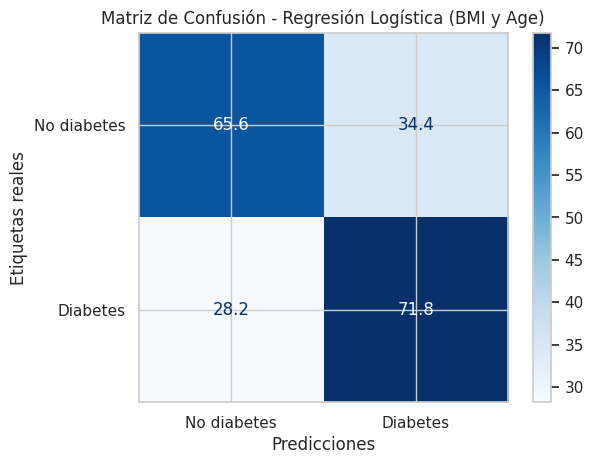

-- Métricas individuales: -- 

Recall: 0.72
Precision: 0.25
F1-score: 0.37

-- Reporte de clasificación: --

              precision    recall  f1-score   support

No diabético       0.94      0.66      0.77     43739
   Diabético       0.25      0.72      0.37      6997

    accuracy                           0.66     50736
   macro avg       0.59      0.69      0.57     50736
weighted avg       0.84      0.66      0.72     50736



In [ ]:
#Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Normalizamos la matriz (valores entre 0 y 100%)
cm_normalized = 100 * cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#Visualizamos la matriz normalizada
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=["No diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues, values_format=".1f")  # Mostrar valores con un decimal
plt.title("Matriz de Confusión - Regresión Logística (BMI y Age)")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas reales")
plt.show()

#Calculamos y mostramos las métricas individuales
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("-- Métricas individuales: -- \n")
print(f"Recall: {round(recall, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"F1-score: {round(f1, 2)}\n")

#Reporte detallado
print("-- Reporte de clasificación: --\n")
print(classification_report(y_test, y_pred, zero_division=1,target_names=["No diabético", "Diabético"]))

La matriz de confusión obtenida muestra un rendimiento modesto pero informativo. En términos específicos, el 65.6% de los pacientes no diabéticos fueron correctamente clasificados como tales (verdaderos negativos), mientras que el 34.4% fueron incorrectamente clasificados como diabéticos (falsos positivos). Por otro lado, el modelo clasificó correctamente al 71.8% de los pacientes diabéticos (verdaderos positivos), y cometió un 28.2% de errores al clasificarlos como no diabéticos (falsos negativos).

Estos resultados reflejan un desempeño que, aunque equilibrado en cuanto a recall, presenta una marcada diferencia en la precisión entre ambas clases. El modelo muestra una alta precisión para la clase "No diabético" (0.94), pero una precisión baja para la clase "Diabético" (0.25), lo que significa que de todos los pacientes que el modelo predice como diabéticos, una gran parte no lo son en realidad. Sin embargo, el recall para los diabéticos es de 0.72, lo cual indica que el modelo sí logra identificar correctamente a la mayoría de los pacientes que realmente tienen diabetes.

En cuanto a las métricas globales del modelo:

* F1-score para la clase "Diabético": 0.37, un valor moderado que refleja el compromiso entre la baja precisión y el alto recall.

* Promedio ponderado del F1-score: 0.72, lo que da una idea del rendimiento general teniendo en cuenta el desbalance de clases (ya que hay muchos más no diabéticos que diabéticos).

En resumen, esto sugiere que el modelo es útil para la detección de pacientes diabéticos, ya que logra identificar a la mayoría de ellos. No obstante, la baja precisión indica que genera muchos falsos positivos, lo que podría llevar a una cantidad considerable de pacientes sin diabetes a ser clasificados erróneamente. Esto puede tener implicaciones clínicas, como la necesidad de realizar pruebas adicionales innecesarias.

El modelo resulta válido como punto de partida para esta etapa inicial, pero será necesario incorporar variables clínicas adicionales y explorar algoritmos más sofisticados que permitan mejorar el equilibrio entre precisión y sensibilidad, con el objetivo de reducir la tasa de falsos positivos sin comprometer la capacidad de detección.

**Conclusión del Modelo de Regresión Logística (BMI y Age):**

El modelo de regresión logística desarrollado tomando como variables predictoras al índice de masa corporal (BMI) y la edad (Age) muestra un desempeño moderado pero funcional para la detección de diabetes. Según las métricas obtenidas, el modelo logra un recall del 72%, una precisión del 25% y un F1-score de 0.37, lo que sugiere que es eficaz para identificar la mayoría de los casos positivos (diabetes), aunque a costa de una alta tasa de falsos positivos.

Estos resultados indican que, si bien el modelo no es lo suficientemente preciso como para ser utilizado como herramienta diagnóstica definitiva, sí resulta útil como primera etapa de detección, especialmente por su capacidad para captar la mayoría de los casos reales de diabetes.Con el objetivo de mejorar el rendimiento general, se incorporarán más variables clínicas y se experimentará con modelos más complejos.

**Segundo modelo de Machine Learning**
---

Para este segundo modelo primero vemos que variables tienen más correlación, y en consecuencia trabajar con las que más se destquen.

Correlaciones con Diabetes_binary:
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Income                  0.163919
Education               0.124456
PhysActivity            0.118133
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
HvyAlcoholConsump       0.057056
Veggies                 0.056584
Fruits                  0.040779
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Name: Diabetes_binary, dtype: float64


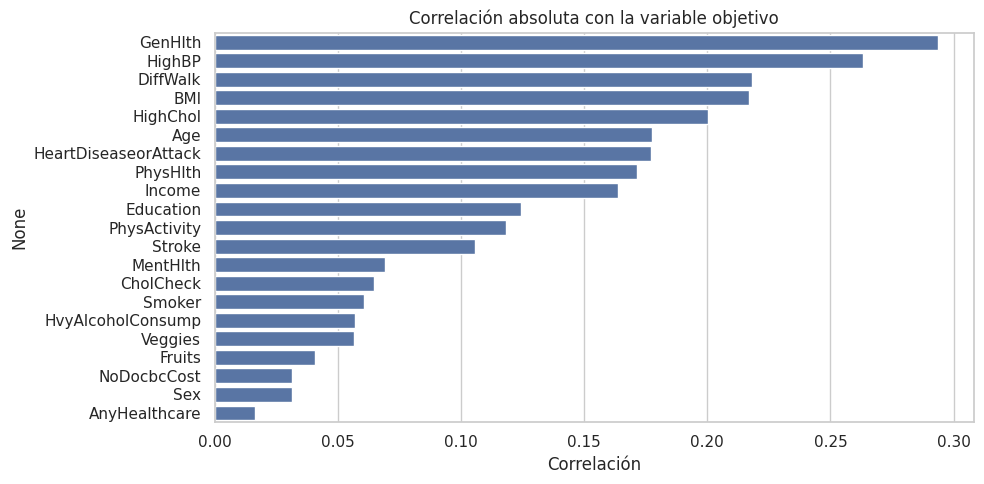

In [ ]:
#Se calcula la matriz de correlación
cor_matrix = df.corr(numeric_only=True)

#Se establece la correlación con la variable target
cor_target = cor_matrix["Diabetes_binary"].drop("Diabetes_binary")

#Se ordena por correlación absoluta
cor_target_sorted = cor_target.abs().sort_values(ascending=False)

#Se muestran los resultados
print("Correlaciones con Diabetes_binary:")
print(cor_target_sorted)

#Se visualiza como gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=cor_target_sorted.values, y=cor_target_sorted.index)
plt.title("Correlación absoluta con la variable objetivo")
plt.xlabel("Correlación")
plt.tight_layout()
plt.show()

El gráfico resultante del análisis de correlaciones absolutas revela que las variables GenHlth, HighBP, DiffWalk y HighChol presentan una correlación destacada con la variable objetivo, acompañando a BMI y Age, que ya formaban parte del primer modelo. Por este motivo, se propone incorporar estas cuatro nuevas variables al segundo modelo, con el fin de aumentar su capacidad predictiva manteniendo un equilibrio razonable entre complejidad y explicabilidad.

Para el desarrollo del segundo modelo de regresión logística se seleccionaron las seis variables predictoras que mostraron fuerte asociación con la condición de diabetes, tanto desde el punto de vista clínico como estadístico. Las variables utilizadas fueron el índice de masa corporal (IMC), la edad (Age), el estado general de salud percibido (GenHlth), la presencia de hipertensión (HighBP), dificultades para caminar (DiffWalk) y colesterol alto (HighChol). La variable objetivo era Diabetes_binary , que indica la presencia o ausencia de diabetes.

Previo al entrenamiento del modelo, se aplicaron técnicas de preprocesamiento para asegurar que los datos estén en condiciones óptimas. Primero, se verificó que no existían valores faltantes en las variables seleccionadas.

Luego, se normalizaron las variables numéricas mediante la técnica StandardScaler , que transforma cada una para tener media cero y desviación estándar uno. En este caso, se escalaron todas las variables incluidas, ya que incluso aquellas que son categóricas ordinales (como GenHlth, HighBP, DiffWalk o HighChol) están representadas con valores numéricos discretos y se benefician del escalado para mejorar la eficiencia del algoritmo.

Por último, el conjunto de datos fue dividido en un 80% para entrenamiento y un 20% para prueba, utilizando una división estratificada sobre la variable objetivo para asegurar que la proporción de clases (casos con y sin diabetes) se mantuviera constante en ambas particiones. Esto es especialmente importante considerando que el conjunto de datos está desequilibrado, y una división aleatoria sin estratificación podría afectar negativamente la evaluación del modelo.


In [ ]:
#Se seleccionan las variables
features_modelo2 = ["BMI", "Age", "GenHlth", "HighBP", "DiffWalk", "HighChol"]
X = df[features_modelo2]
y = df["Diabetes_binary"]

#Se separan los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Se realiza el escalado de variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Se entrena el modelo
modelo2 = LogisticRegression(class_weight='balanced', random_state=42)
modelo2.fit(X_train, y_train)

#Se realiza la prediccion y se evalúa
y_pred = modelo2.predict(X_test)
print("Reporte de clasificación - Regresión logística\n")
print(classification_report(y_test, y_pred))

Reporte de clasificación - Regresión logística

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43739
         1.0       0.30      0.77      0.44      6997

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



**Evaluación del segundo modelo**
---

**Evaluamos el segundo modelo utilizando la metodología aplicada para el caso anterior:**

Una vez entrenado el segundo modelo de regresión logística con las variables BMI, Age, GenHlth, HighBP, DiffWalk y HighChol, se incorporó el parámetro class_weight='balanced' con el objetivo de compensar el desbalance de clases presente en la variable objetivo. Esta estrategia ajusta automáticamente el peso de cada clase en función de su frecuencia, permitiendo que el modelo preste mayor atención a la clase minoritaria (diabetes).

Se evaluó su desempeño en el conjunto de prueba utilizando varias métricas clave para problemas de clasificación:
.

* Precision: 30% -->
De todas las personas que el modelo clasificó como diabéticas, solo el 30% realmente lo son. Este valor relativamente bajo indica una alta tasa de falsos positivos.

* Recall: 77% -->
El modelo logra identificar correctamente al 77% de los casos reales de diabetes. Este alto recall es especialmente importante en aplicaciones médicas, donde es preferible detectar la mayoría de los casos positivos, incluso si esto implica generar algunas alertas innecesarias.

* F1-score: 44% -->
Este valor representa un equilibrio entre precisión y recall. Refleja que, aunque el modelo tiene una baja precisión, logra una buena capacidad de detección general.


Para complementar la evaluación cuantitativa del segundo modelo de regresión logística, se generó una visualización de la frontera de decisión proyectada en dos dimensiones, utilizando las variables BMI (índice de masa corporal) y Age (edad). Esta representación permite observar cómo el modelo separa las clases (presencia o ausencia de diabetes) en función de estas dos variables, mientras que las restantes se mantuvieron constantes en valores representativos (mediana o moda).

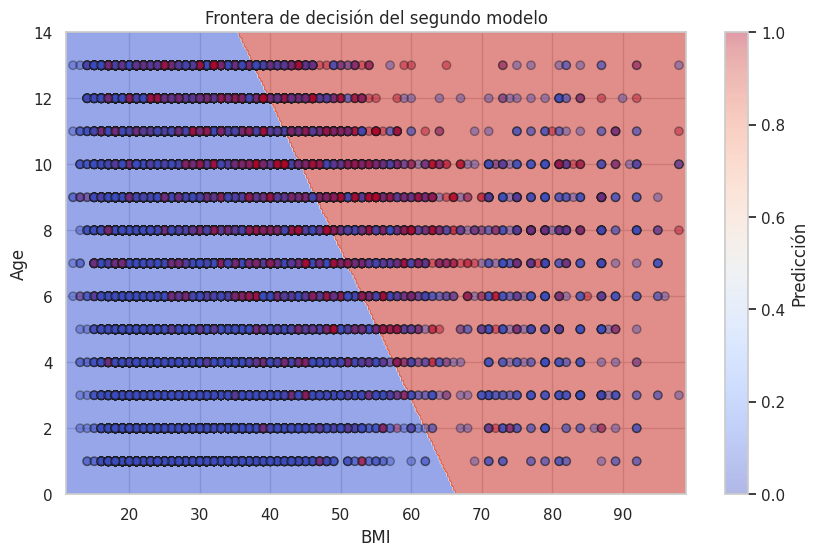

In [ ]:
#Selección de dos variables para proyectar la frontera (BMI y Age)
x_var = "BMI"
y_var = "Age"

#Grid de valores
x_min, x_max = df[x_var].min() - 1, df[x_var].max() + 1
y_min, y_max = df[y_var].min() - 1, df[y_var].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

#Se crea un DataFrame con las 6 variables, donde BMI y Age toman valores del grid
grid = pd.DataFrame({
    x_var: xx.ravel(),
    y_var: yy.ravel(),
    "GenHlth": df["GenHlth"].median(),
    "HighBP": df["HighBP"].mode()[0],
    "DiffWalk": df["DiffWalk"].mode()[0],
    "HighChol": df["HighChol"].mode()[0]
})

#Se escalan las variables como se hizo en el entrenamiento
grid_scaled = scaler.transform(grid)

#Se obtienen las predicciones del modelo
Z = modelo2.predict(grid_scaled)
Z = Z.reshape(xx.shape)

#Se grafica la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(df[x_var], df[y_var], c=df["Diabetes_binary"], cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.4)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title("Frontera de decisión del segundo modelo")
plt.colorbar(label="Predicción")
plt.grid(True)
plt.show()

En el gráfico se observa claramente la línea de separación entre las predicciones de clase 0 (no diabético, en azul) y clase 1 (diabético, en rojo). La frontera de decisión es lineal, coherente con la naturaleza del modelo de regresión logística. A medida que aumentan el BMI y la edad, el modelo tiende a clasificar con mayor probabilidad como positivos (diabéticos), lo cual es consistente con el conocimiento médico: el riesgo de diabetes suele incrementarse con la edad y el sobrepeso. Esta visualización reafirma que el modelo está capturando relaciones razonables entre las variables, y que la decisión del modelo cambia progresivamente en función del perfil del paciente.

Luego de ajustar la frontera de decisión del segundo modelo con el objetivo de mejorar la detección de pacientes diabéticos, se procedió a evaluar su desempeño mediante una matriz de confusión. Esta herramienta permite observar de manera detallada la cantidad de aciertos y errores cometidos por el modelo en cada clase, comparando las etiquetas verdaderas con las predichas. A partir de esta matriz, se calcularon métricas claves como la precisión, recall y F1-score, las cuales brindan una visión más completa sobre la calidad de las predicciones, especialmente en contextos donde las clases están desbalanceadas.

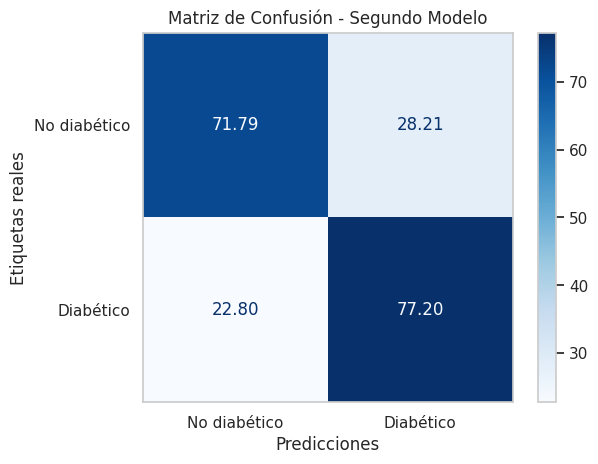

-- Métricas del Segundo Modelo --
Precision: 0.3045
Recall:    0.7720
F1-score:  0.4367

-- Reporte de Clasificación --
              precision    recall  f1-score   support

No diabético       0.95      0.72      0.82     43739
   Diabético       0.30      0.77      0.44      6997

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



In [ ]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  #normalizamos por filas
cm_percentage = cm_normalized * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=["No diabético", "Diabético"])
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Matriz de Confusión - Segundo Modelo")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas reales")
plt.grid(False)
plt.show()

#calculo las métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("-- Métricas del Segundo Modelo --")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}\n")

#Reporte de clasificación
print("-- Reporte de Clasificación --")
print(classification_report(y_test, y_pred, target_names=["No diabético", "Diabético"]))


El modelo logró clasificar correctamente al 71.79% de los individuos no diabéticos y al 77.20% de los individuos diabéticos, lo que indica una buena capacidad para distinguir ambas clases.

No obstante, también se observa que el 28.21% de los no diabéticos fueron clasificados erróneamente como diabéticos (falsos positivos), mientras que el 22.80% de los diabéticos no fueron detectados por el modelo (falsos negativos).

Este comportamiento se refleja en las métricas de evaluación: un recall del 77.20% para la clase "diabético", que indica una alta sensibilidad en la detección de casos positivos, lo cual es especialmente relevante en contextos clínicos preventivos. Sin embargo, la precisión relativamente baja (30.45%) indica que una proporción importante de los individuos clasificados como diabéticos en realidad no lo son. Esto revela que el modelo tiende a sobre-diagnosticar, priorizando minimizar los falsos negativos, a costa de aumentar los falsos positivos.

En general, el modelo muestra un buen desempeño en términos de detección de casos positivos, lo cual es valioso en tareas de cribado o tamizaje poblacional, donde es preferible errar por exceso (falsos positivos) que por omisión (falsos negativos).

**Evaluamos el modelo utilizando validación cruzada:**

Para evaluar la capacidad de generalización del segundo modelo de regresión logística, que incluye seis variables predictoras (BMI, Age, GenHlth, HighBP, DiffWalk y HighChol), se aplicó validación cruzada estratificada de 5 particiones. Esta técnica nos permite estimar el rendimiento del modelo en distintos subconjuntos del dataset, reduciendo el sesgo asociado a una única partición de entrenamiento y prueba. Se utilizaron métricas clave como precision, recall y F1-score para tener una visión más completa del desempeño.

In [ ]:
#Se define un pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

#Validación cruzada estratificada con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Métricas a evaluar
scoring = ['precision', 'recall', 'f1']

#Evaluación el modelo
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, return_train_score=False)

#Se muestran los resultados como tabla
resultados_df = pd.DataFrame({
    'Precision': cv_results['test_precision'],
    'Recall': cv_results['test_recall'],
    'F1-score': cv_results['test_f1']
})

#Se muestran los resultados por fold
print("Resultados por fold:")
print(resultados_df)

#Promedios generales
print("\nPromedios:")
print(resultados_df.mean())

#Desvío estándar
print("\nDesvíos estándar:")
print(resultados_df.std())

La validación cruzada estratificada de 5 pliegues confirma la estabilidad y solidez del segundo modelo de regresión logística. El recall promedio alcanzó el 76.2%, mostrando nuevamente una fuerte capacidad del modelo para identificar correctamente a la mayoría de los pacientes con diabetes.

Sin embargo, la precisión se mantuvo relativamente baja (30.5%), lo que implica una proporción significativa de falsos positivos, en línea con lo observado previamente en la evaluación sobre el conjunto de prueba. La F1-score promedio fue de 43.6%, evidenciando un equilibrio moderado entre precisión y recall.

En conjunto, estos resultados refuerzan que el modelo es eficaz como herramienta de detección temprana, especialmente por su alta sensibilidad, pero que aún requiere mejoras si se pretende utilizar como herramienta de diagnóstico definitivo.

**Comparamos con lo realizado en el punto anterior:**

El segundo modelo de regresión logística fue evaluado inicialmente utilizando un conjunto de prueba separado, y luego mediante validación cruzada estratificada de 5 pliegues. A continuación se comparan los resultados obtenidos a través de ambas metodologías, considerando las métricas más relevantes para problemas de clasificación binaria: precision, recall y F1-score.


1. Precision (Precisión para la clase positiva - diabético)
   * Evaluación en test set: 30.45%

   * Validación cruzada (promedio): 30.5% (±0.23%)

    La precisión se mantuvo baja en ambos casos, lo que significa que, de todas las personas que el modelo clasifica como diabéticas, solo alrededor del 30% realmente lo son. Este comportamiento refleja una tendencia del modelo a generar falsos positivos. Es un resultado esperable en modelos diseñados para maximizar la sensibilidad (recall), como ocurre en escenarios de tamizaje médico.

2. Recall (Sensibilidad para la clase positiva - diabético)
  * Evaluación en test set: 77.2%

  * Validación cruzada (promedio): 76.2% (±1.0%)

    La sensibilidad fue alta en ambas evaluaciones, lo que indica que el modelo logra identificar correctamente entre el 76% y 77% de los casos reales de diabetes. Esta es una característica deseable en contextos clínicos, donde es preferible detectar la mayor cantidad de casos positivos posibles, incluso a costa de cometer algunos errores por exceso (falsos positivos).

3. F1-score (Equilibrio entre precisión y recall)
   * Evaluación en test set: 43.67%

  * Validación cruzada (promedio): 43.6% (±0.38%)

    El F1-score se mantuvo prácticamente constante entre ambas evaluaciones, lo que demuestra que el equilibrio entre precisión y recall del modelo es consistente y no depende de una partición específica del dataset.





* En resumen, los resultados de la validación cruzada confirman los hallazgos obtenidos en la evaluación sobre el conjunto de prueba: el segundo modelo de regresión logística tiene un rendimiento estable y robusto, con una alta capacidad para identificar casos positivos de diabetes (recall elevado), aunque con una precisión baja, lo que genera una proporción importante de falsos positivos.

  El bajo desvío estándar de las métricas en la validación cruzada refuerza la confiabilidad del modelo, al evidenciar que su rendimiento no varía significativamente entre diferentes subconjuntos del dataset. En este sentido, el modelo es adecuado para tareas de detección temprana o tamizaje poblacional, donde el objetivo principal es no omitir pacientes con riesgo de diabetes, aunque se generen algunas alertas innecesarias.

Para complementar el análisis cuantitativo de las métricas de rendimiento del segundo modelo de regresión logística, se construyó un gráfico comparativo de barras que visualiza los valores obtenidos mediante evaluación sobre el conjunto de prueba y los promedios obtenidos en la validación cruzada estratificada (5 pliegues). Este tipo de representación permite observar de forma intuitiva y clara el grado de consistencia entre ambas estrategias de evaluación para métricas clave como precision, recall y F1-score.

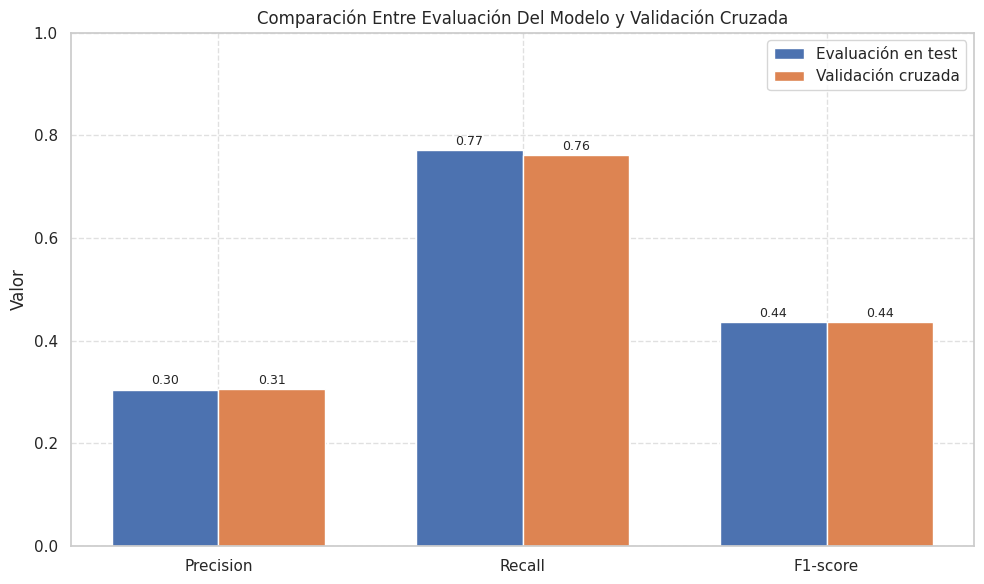

In [ ]:
#Valores de test y validación cruzada
metricas = ['Precision', 'Recall', 'F1-score']
evaluacion_test = [0.3045, 0.7720, 0.4367]
validacion_cv = [0.3054, 0.7621, 0.4361]

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, evaluacion_test, width, label='Evaluación en test')
bars2 = ax.bar(x + width/2, validacion_cv, width, label='Validación cruzada')


ax.set_ylabel('Valor')
ax.set_title('Comparación Entre Evaluación Del Modelo y Validación Cruzada')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

#Se muestran los valores en las barras
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


El gráfico evidencia visualmente lo que se observó en el análisis numérico: el modelo muestra una alta estabilidad entre las métricas obtenidas en el conjunto de prueba y los promedios de la validación cruzada. Las barras correspondientes a cada métrica se encuentran prácticamente alineadas, indicando que el rendimiento del modelo no varía significativamente ante distintas particiones del conjunto de datos.

Esto refuerza la idea de que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento. En particular:


* Precision es baja (~0.30) en ambos casos, reflejando una proporción importante de falsos positivos.

* Recall se mantiene elevado (~0.76–0.77), lo cual es valioso en el contexto clínico.

* F1-score presenta un equilibrio constante, en torno a 0.44.

En resumen, el gráfico nos sirve como una representación visual clara de que el desempeño del modelo es consistente y robusto.

**Se imprimen y analizan todos los coeficientes:**

**¿Qué condiciones se tienen que cumplir para poder interpretar los coeficientes como importancia de atributos?**

En el caso de la regresión logística, los coeficientes del modelo pueden interpretarse como indicadores de la importancia relativa de cada atributo sobre la probabilidad de que ocurra el evento (en este caso, que una persona tenga diabetes), siempre que se cumplan ciertas condiciones:


* Estandarización de las variables:
  
  Es necesario que todas las variables predictoras estén en la misma escala. En este trabajo se utilizó la transformación StandardScaler, que convierte todas las variables a una distribución con media cero y desviación estándar uno. Esto permite comparar directamente la magnitud de los coeficientes entre atributos.

* Ausencia de multicolinealidad significativa:

  Si existe alta correlación entre dos o más variables predictoras, los coeficientes pueden volverse inestables e interpretarse erróneamente. En este análisis no se observaron signos evidentes de multicolinealidad, y las variables seleccionadas son clínicamente distintas entre sí.

* Modelo sin regularización excesiva:

  El modelo utilizado incluye la regularización L2 por defecto, que penaliza coeficientes extremos sin anularlos completamente. Si se utilizara una regularización muy fuerte (por ejemplo, ajustando un valor de C muy bajo), podría reducir artificialmente la magnitud de algunos coeficientes, distorsionando su interpretación como medida de importancia.

* Relación lineal con los log-odds:

  La regresión logística asume una relación lineal entre cada variable independiente y el logaritmo de las probabilidades del resultado (log-odds). Si esta suposición es razonable, los coeficientes pueden interpretarse como el cambio esperado en los log-odds del evento (diabetes) por cada unidad estandarizada que aumenta esa variable.

Dado que en este modelo se cumplieron las condiciones mencionadas, los coeficientes pueden interpretarse como medidas comparables de importancia relativa entre los atributos. A continuación listamos los coeficientes estandarizados obtenidos:

In [ ]:
#Variables utilizadas
nombres_atributos = ['BMI', 'Age', 'GenHlth', 'HighBP', 'DiffWalk', 'HighChol']

#Coeficientes obtenidos del modelo
coeficientes = modelo2.coef_[0]

#Creamos la tabla resumen
df_coef = pd.DataFrame({'Atributo': nombres_atributos, 'Coeficiente': coeficientes})
print(df_coef.sort_values(by='Coeficiente', ascending=False))

   Atributo  Coeficiente
2   GenHlth     0.642135
1       Age     0.505123
0       BMI     0.494825
3    HighBP     0.383317
5  HighChol     0.287233
4  DiffWalk     0.049667


Los resultados del modelo muestran que GenHlth (percepción del estado general de salud) es el atributo con mayor influencia en la predicción del riesgo de diabetes, seguido por Age (edad) y BMI (índice de masa corporal), ambos reconocidos factores de riesgo. En cambio, DiffWalk (dificultad para caminar) presenta un coeficiente considerablemente menor, lo que indica una menor contribución relativa a la predicción en comparación con las demás variables.

Como se utilizó un modelo de regresión logística con variables estandarizadas, sin presencia significativa de multicolinealidad ni regularización, los coeficientes pueden interpretarse válidamente como medidas de importancia relativa de cada atributo. Estos coeficientes representan el cambio en el logaritmo de las probabilidades (log-odds) de ser diagnosticado con diabetes ante un aumento de una unidad estandarizada en el valor del atributo, manteniendo constantes los demás.

En otras palabras, cuanto mayor es el valor positivo del coeficiente, mayor es la influencia del atributo en la probabilidad de que el modelo prediga un diagnóstico positivo de diabetes.



**Análisis comparativo entre los modelos y el Benchmark**
---

Para finalizar nuestro análisis y comparar los modelos creados, se evaluó su desempeño mediante métricas de error y capacidad de clasificación. Esto permitió determinar cuál de los modelos desarrollados es más adecuado para una futura aplicación operativa.

En este caso, se comparan las curvas ROC de los dos modelos desarrollados, utilizando el área bajo la curva (AUC) como métrica principal de evaluación: cuanto mayor sea el AUC, mejor será la capacidad predictiva del modelo.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


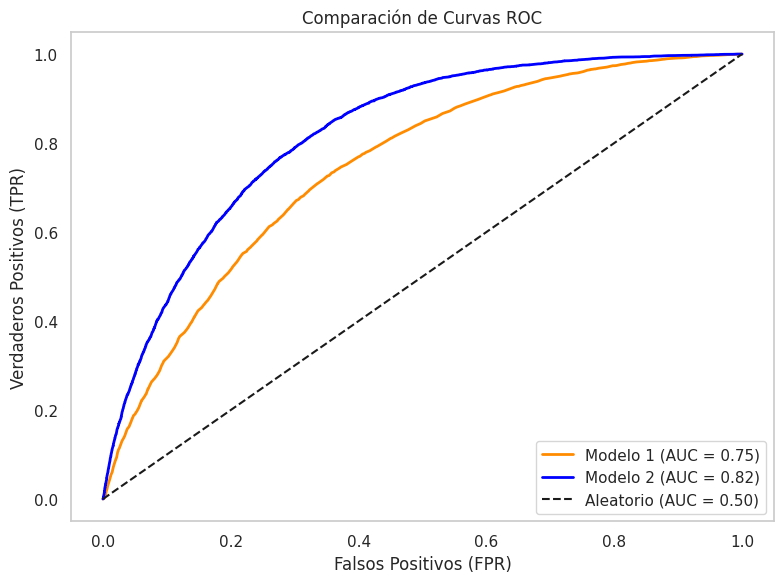

In [ ]:
#Curva ROC comparativa de los dos modelos de regresión logística:

#Variables para ambos modelos
features_model1 = ["BMI", "Age"]
features_model2 = ["BMI", "Age", "GenHlth", "HighBP", "DiffWalk", "HighChol"]
target = df["Diabetes_binary"]

#Modelo 1: split y escalado
X1 = df[features_model1]
X1_train, X1_test, y_train, y_test = train_test_split(X1, target, test_size=0.2, random_state=42)
scaler1 = StandardScaler()
scaler1.fit(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

#Modelo 2: split y escalado
X2 = df[features_model2]
X2_train, X2_test, _, _ = train_test_split(X2, target, test_size=0.2, random_state=42)
scaler2 = StandardScaler()
scaler2.fit(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

#Predicciones y métricas
y_proba1 = model.predict_proba(X1_test_scaled)[:, 1]
y_proba2 = modelo2.predict_proba(X2_test_scaled)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, y_proba1)
fpr2, tpr2, _ = roc_curve(y_test, y_proba2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

#Se grafica
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Modelo 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'Modelo 2 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)')
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

En la gráfica se comparan las curvas ROC de los dos modelos evaluados. El Modelo 2 presenta un mejor rendimiento que el Modelo 1, con un AUC de 0.82 frente a 0.75. Esto nos indica que el Modelo 2 tiene mayor capacidad para diferenciar entre casos positivos y negativos (personas con o sin diabetes), siendo más efectivo en términos de clasificación. Además, ambos modelos superan claramente la línea diagonal (modelo aleatorio con AUC = 0.50), lo que nos confirma que tienen capacidad predictiva real



**Conclusiones de la comparativa entre los modelos**


A partir del análisis comparativo entre los modelos desarrollados y el benchmark, se observa que ambos modelos superan notablemente el rendimiento del benchmark en todas las métricas evaluadas. El Modelo 2 se posiciona como el de mejor desempeñO. Además, la curva ROC confirma su superioridad en tareas de clasificación, alcanzando un AUC de 0.82 frente a 0.75 del Modelo 1, lo cual refleja una mejor capacidad para discriminar entre clases.

En base a estos resultados, se concluye que el Modelo 2 sería el más adecuado para una fase operativa, ya que ofrece un equilibrio óptimo entre exactitud y capacidad predictiva. Su implementación práctica permitiría tomar decisiones con mayor confiabilidad y eficiencia.

No obstante, aún existe margen de mejora. Si bien el Modelo 2 ofrece buenos resultados, podrían explorarse estrategias adicionales.

En síntesis, el Modelo 2 es la mejor alternativa actual, pero con oportunidades claras para seguir optimizando su desempeño en fases futuras.

**Trabajo a futuro**
---

Para continuar con este trabajo, sería recomendable explorar otros algoritmos de clasificación, como árboles de decisión, Random Forest o métodos de Gradient Boosting, que suelen ofrecer un buen equilibrio entre rendimiento y capacidad de interpretación. Estos modelos, además de poder captar relaciones no lineales entre las variables, permiten analizar la importancia de cada atributo en la predicción, lo cual resulta especialmente valioso en contextos clínicos donde la interpretabilidad es crucial.

También sería conveniente ampliar el conjunto de variables predictoras. El dataset original incluye numerosos indicadores de salud adicionales que no fueron utilizados en esta etapa del trabajo, y que podrían aportar información relevante. Incluir estas variables permitiría capturar de manera más completa el estado clínico de los individuos y construir modelos potencialmente más robustos y clínicamente significativos.

Además, podría aplicarse una optimización más sistemática de los hiperparámetros de los modelos mediante técnicas como Grid Search o Random Search, combinadas con validación cruzada. Esto contribuiría a mejorar tanto el ajuste como la capacidad de generalización de los modelos en nuevos datos, lo que es fundamental en aplicaciones del mundo real.

**Conclusiones de la segunda parte**
----

En este trabajo se exploró la posibilidad de predecir la presencia de diabetes a partir de indicadores de salud y estilo de vida utilizando técnicas de aprendizaje automático.

Inicialmente se desarrolló un modelo de referencia utilizando un clasificador dummy que nos sirvió como punto de comparación para evaluar si los modelos realmente aprendían algo útil de los datos. Luego se implementó un modelo de regresión logística simple con tan solo dos variables y más adelante se construyó uno más complejo incorporando seis predictores relevantes. En cada etapa del proceso resultó prioritario el uso de buenas prácticas como el escalado de variables y el balanceo de clases dado que se trataba de un conjunto desbalanceado lo que fue clave para mejorar el rendimiento del modelo.

Durante la evaluación se utilizaron métricas como precisión, recall y AUC, además de herramientas visuales como la matriz de confusión y la curva ROC lo cual permitió obtener una mirada más completa del comportamiento del modelo en diferentes escenarios. Pudo observarse que a medida que se incorporaba más información el modelo lograba detectar mejor los casos positivos sin perder demasiada precisión lo cual resulta especialmente importante en el contexto clínico donde evitar falsos negativos es prioritario.

#**EXTRA:**

**Análisis complementario del segundo modelo: selección automática de atributos con Lasso**



Como complemento al segundo modelo de regresión logística, se implementó una versión extendida que utiliza la totalidad de los atributos disponibles en el dataset, sin realizar selección previa por correlación.  
El objetivo fue aplicar regresión logística con regularización tipo Lasso (penalización L1), una técnica que permite realizar selección automática de variables al reducir a cero los coeficientes de aquellos atributos menos relevantes para la predicción.

Este enfoque nos permite explorar qué variables son efectivamente útiles para el modelo sin imponer restricciones previas, lo cual resulta particularmente valioso en contextos exploratorios o cuando se desea evaluar la robustez de las decisiones de selección de variables.

Para ello, se utilizó un pipeline que incluye escalado (`StandardScaler`) y un modelo de regresión logística con penalización L1 (`penalty='l1'`), ajustando el hiperparámetro `C` mediante validación cruzada (`GridSearchCV`) para encontrar el mejor valor que equilibra ajuste y regularización.

A continuación se presentan los resultados del modelo entrenado con regularización Lasso:


Mejor valor de C: 10

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43667
         1.0       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736

Accuracy: 0.7316

Atributos seleccionados por Lasso (coeficiente ≠ 0):
HighBP: 0.3646
HighChol: 0.2873
CholCheck: 0.2490
BMI: 0.4905
Smoker: 0.0022
Stroke: 0.0373
HeartDiseaseorAttack: 0.0731
PhysActivity: -0.0194
Fruits: -0.0348
Veggies: -0.0072
HvyAlcoholConsump: -0.1732
AnyHealthcare: 0.0139
NoDocbcCost: 0.0134
GenHlth: 0.6183
MentHlth: -0.0326
PhysHlth: -0.0581
DiffWalk: 0.0373
Sex: 0.1393
Age: 0.4570
Education: -0.0374
Income: -0.1195


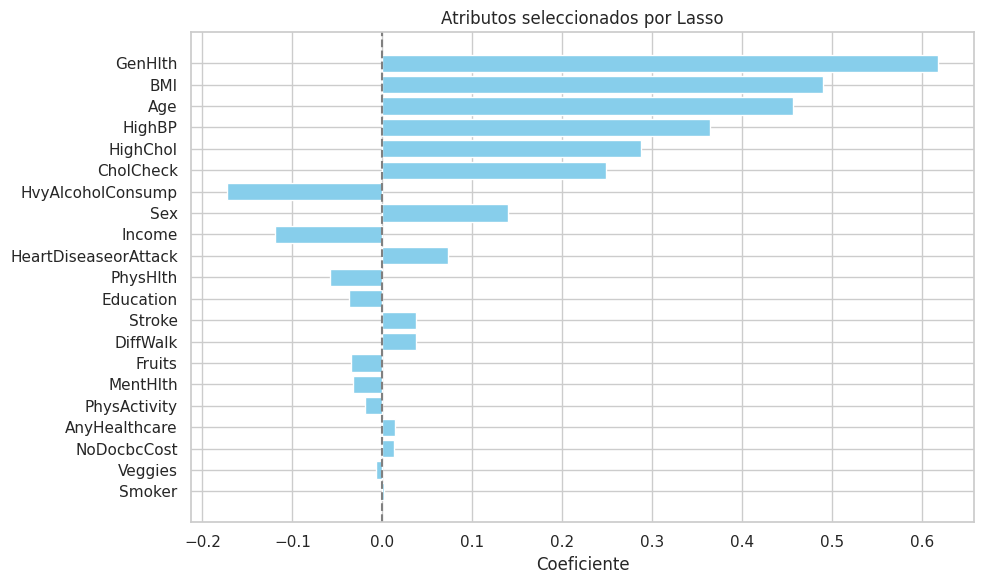

In [ ]:
#entrenamos y evaluamos la regresión logística con Lasso


#defino X e y con todas las variables
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#escalamos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Modelo Lasso
modelo_lasso = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)

#Búsqueda del mejor C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(modelo_lasso, param_grid, scoring='f1', cv=5)
grid.fit(X_train_scaled, y_train)

#resultados
modelo_final = grid.best_estimator_
y_pred = modelo_final.predict(X_test_scaled)

print("Mejor valor de C:", grid.best_params_['C'])
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

#Mostramos los atributos relevantes
atributos = X.columns
coeficientes = modelo_final.coef_[0]

print("\nAtributos seleccionados por Lasso (coeficiente ≠ 0):")
for nombre, valor in zip(atributos, coeficientes):
    if abs(valor) > 1e-4:
        print(f"{nombre}: {valor:.4f}")

#Gráfico de barras
df_coef = pd.DataFrame({
    'Atributo': atributos,
    'Coeficiente': coeficientes
})
df_coef = df_coef[df_coef['Coeficiente'].abs() > 1e-4]
df_coef = df_coef.sort_values(by='Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_coef['Atributo'], df_coef['Coeficiente'], color='skyblue')
plt.xlabel("Coeficiente")
plt.title("Atributos seleccionados por Lasso")
plt.axvline(0, color='gray', linestyle='--')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


La regresión logística con regularización Lasso nos permitió identificar de forma automática cuáles son las variables más relevantes para predecir la presencia de diabetes a partir del conjunto completo de atributos disponibles. Al no hacer una selección previa por correlación, este modelo sirve como validación adicional y exploratoria de lo que ya se había observado en el segundo modelo. El mejor valor de C obtenido fue 10, lo cual indica que el modelo aplicó una penalización leve, permitiendo mantener bastantes variables activas en la predicción. Entre las que más peso tuvieron se destacan GenHlth, BMI, Age, HighBP y HighChol, lo que coincide con lo hallado previamente tanto en los análisis de correlación como en la selección clínica realizada para el segundo modelo. También aparecieron como relevantes otras variables como CholCheck o el sexo, mientras que algunas como HvyAlcoholConsump o Income mostraron coeficientes negativos, sugiriendo una relación inversa más tenue. El rendimiento general del modelo con Lasso fue muy similar al del segundo modelo: alcanzó un accuracy del 73%, un recall del 76% para los casos positivos y un F1-score del 44%, valores prácticamente idénticos a los obtenidos antes. Esto confirma que la selección de variables realizada manualmente fue bastante acertada, pero además abre la posibilidad de considerar nuevas variables en futuros modelos. En resumen, Lasso aportó una forma automatizada de verificar y extender los hallazgos anteriores, sin deteriorar el desempeño predictivo.